In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Load the dataset
file_path = '/content/sample_data/wines_SPA.csv'
wine_data = pd.read_csv(file_path)

In [32]:
# Convert 'year' column to string to handle non-numeric values
wine_data['year'] = wine_data['year'].astype(str)


In [33]:
# Identify non-numeric values in the 'year' column
non_numeric_years = wine_data[~wine_data['year'].str.isnumeric()]['year'].unique()
print(f"Non-numeric year values: {non_numeric_years}")


Non-numeric year values: ['N.V.' 'nan']


In [34]:
# Remove rows with non-numeric 'year' values
wine_data = wine_data[wine_data['year'].str.isnumeric()]

In [35]:
# Convert 'year' column to integer type
wine_data['year'] = wine_data['year'].astype(int)

In [36]:

# Handling missing values
# Drop rows with missing 'year' values (already handled above)
# Fill missing 'type' values with 'Unknown'
wine_data['type'].fillna('Unknown', inplace=True)

# Fill missing 'body' and 'acidity' values with their respective mean
wine_data['body'].fillna(wine_data['body'].mean(), inplace=True)
wine_data['acidity'].fillna(wine_data['acidity'].mean(), inplace=True)

In [37]:
# Verify changes
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7210 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7210 non-null   object 
 1   wine         7210 non-null   object 
 2   year         7210 non-null   int64  
 3   rating       7210 non-null   float64
 4   num_reviews  7210 non-null   int64  
 5   country      7210 non-null   object 
 6   region       7210 non-null   object 
 7   price        7210 non-null   float64
 8   type         7210 non-null   object 
 9   body         7210 non-null   float64
 10  acidity      7210 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 675.9+ KB


In [38]:
# Data Summary
summary = wine_data.describe()
print(summary)

              year       rating   num_reviews        price         body  \
count  7210.000000  7210.000000   7210.000000  7210.000000  7210.000000   
mean   2013.495839     4.255381    448.206935    61.508695     4.163756   
std       6.940450     0.118609    615.388822   152.837021     0.544997   
min    1910.000000     4.200000     25.000000     5.500000     2.000000   
25%    2011.000000     4.200000    389.000000    19.900000     4.000000   
50%    2015.000000     4.200000    404.000000    28.530000     4.000000   
75%    2017.000000     4.200000    415.000000    53.775000     4.163756   
max    2021.000000     4.900000  16505.000000  3119.080000     5.000000   

           acidity  
count  7210.000000  
mean      2.947117  
std       0.222853  
min       1.000000  
25%       3.000000  
50%       3.000000  
75%       3.000000  
max       3.000000  


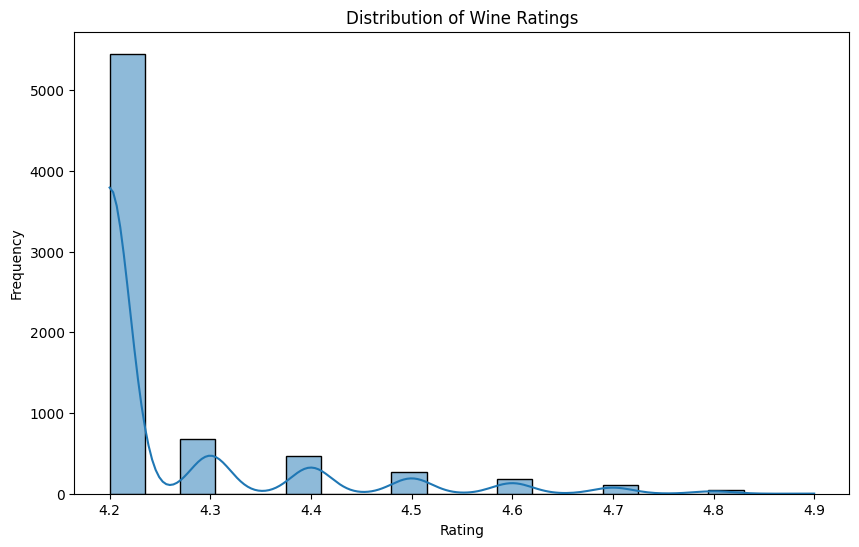

In [39]:
# Exploratory Data Analysis (EDA)

# Distribution of Wine Ratings
plt.figure(figsize=(10, 6))
sns.histplot(wine_data['rating'], bins=20, kde=True)
plt.title('Distribution of Wine Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


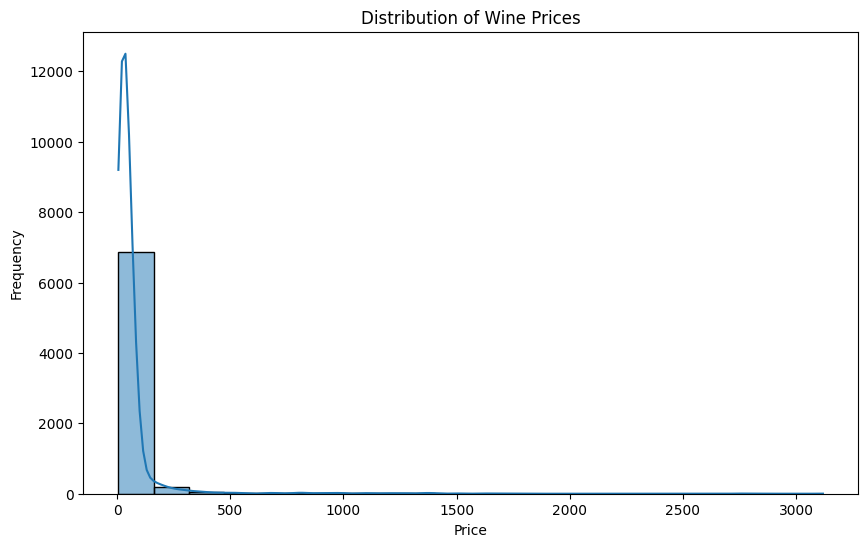

In [40]:
# Distribution of Wine Prices
plt.figure(figsize=(10, 6))
sns.histplot(wine_data['price'], bins=20, kde=True)
plt.title('Distribution of Wine Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

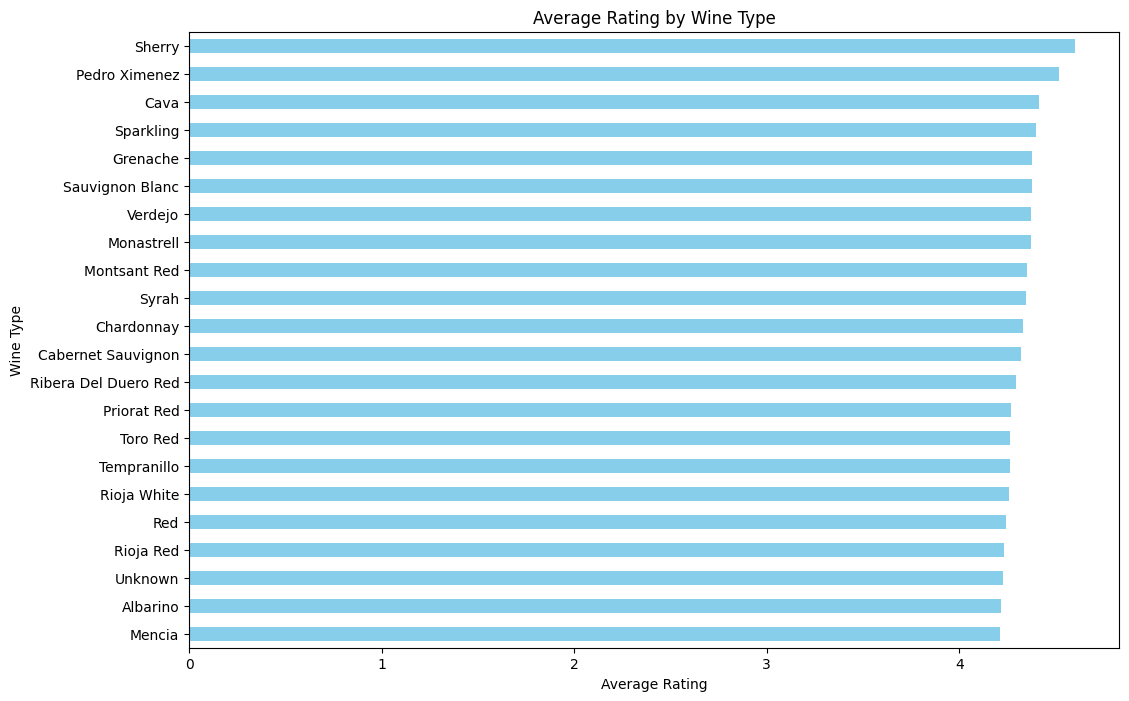

In [41]:
# Average Rating by Wine Type
plt.figure(figsize=(12, 8))
avg_rating_by_type = wine_data.groupby('type')['rating'].mean().sort_values()
avg_rating_by_type.plot(kind='barh', color='skyblue')
plt.title('Average Rating by Wine Type')
plt.xlabel('Average Rating')
plt.ylabel('Wine Type')
plt.show()

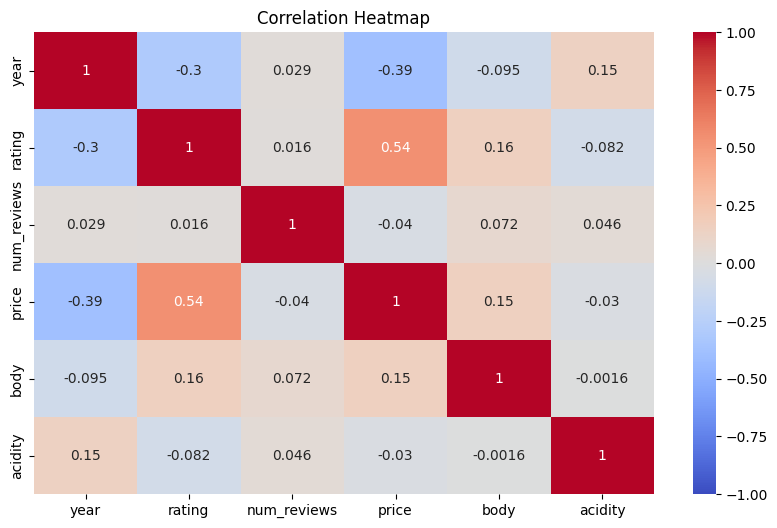

In [42]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
numeric_columns = wine_data.select_dtypes(include=['float64', 'int64']).columns
corr = wine_data[numeric_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()